<br>

### Importando as bibliotecas
<br>

In [26]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

<br>

### Chamando o arquivo limpo e verificando
<br>

In [7]:
df_titanic = pd.read_csv("titanic_github_limpo", sep=",")


In [8]:
#verificando
df_titanic.head()

#deu certo

,passenger_id,survived,p_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br>

### Verificando se há linha duplicada ou se há linha completa com NaN


<br>

  

- Não há nenhuma duplicação;
- Não há nenhuma linha completa com NaN.

In [9]:
df_titanic.duplicated().any()

#não tem nada duplicado

False

In [10]:
df_titanic[df_titanic.isnull().all(axis=1)]

#não tem nenhum registro em que toda a linha seja nula

,passenger_id,survived,p_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


<br>

### Análise com o recurso .describe()
<br>

#### Observações

- Há falta de dados na coluna "age". Todas as células da linha COUNT possuem valor 1309, exceto a coluna AGE;
- As idades varias de 0.17 a 80 anos, tendo como média, 30 anos de idade;
- 37,74% dos tripulantes sobreviveram ao naufrágio.

In [19]:
df_titanic.describe()

,passenger_id,survived,p_class,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Distribuição das idades

#### Observações

- A maioria dos passageiros possui pouco mais de vinte anos e menos de 40

- Apesar da distribuição de idades de homens e mulheres terem o pico entre 20 e 30 anos, dá para perceber que a concavidade da distribuição feminina é mais aberta e está mais à esquerda, em relação à masculina. Isso quer dizer que a maior parte das mulheres do navio eram um pouco mais novas do que os homens.



<br>

<i> - Distribuição geral
<br>

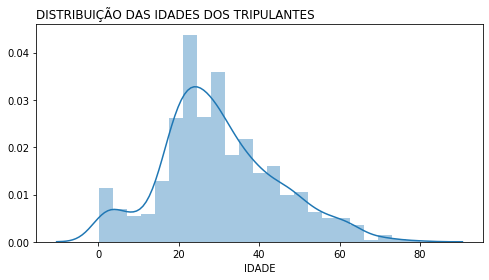

In [39]:
plt.figure(figsize=(8,4))
sns.distplot(df_titanic["age"].dropna())
plt.xlabel("Idade".upper(), size=10)
plt.title("Distribuição das idades dos tripulantes".upper(), loc="left");

<br>

<i> - Distribuição feminina
<br>

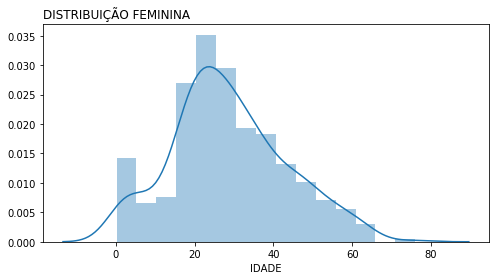

In [51]:
women = df_titanic[df_titanic["sex"] == "female"].copy()
plt.figure(figsize=(8,4))
sns.distplot(women["age"].dropna())
plt.xlabel("Idade".upper(), size=10)
plt.title("Distribuição feminina".upper(), loc="left");

<br>

<i> - Distribuição masculina
<br>

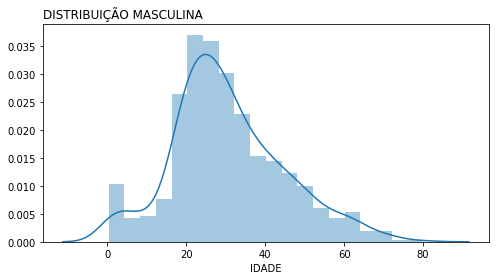

In [52]:
men = df_titanic[df_titanic["sex"] == "male"].copy()
plt.figure(figsize=(8,4))
sns.distplot(men["age"].dropna())
plt.xlabel("Idade".upper(), size=10)
plt.title("Distribuição masculina".upper(), loc="left");

### Avaliando as variáveis idade e sexo com a taxa de sobrevivência

    A meu ver, essas são as variáveis que têm maior relação com o índice de sobrevivência da tripulação

#### Observações

- Pelas distribuições foi possível visualizar que há uma certa continuidade em toda a distribuição de sobreviventes do sexo feminino, com maiores taxas até a idade de 50 anos, ao passo que para o sexo masculino isso não ocorre da mesma forma. Para os homens, a sobrevivência se sobressai na faixa etária menor do que 20 anos de idade e por volta dos 75 a 80 anos.

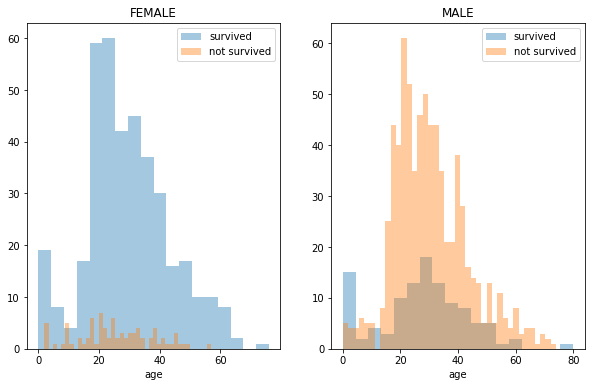

In [97]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
women = df_titanic[df_titanic['sex']=='female']
men = df_titanic[df_titanic['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('female'.upper())
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('male'.upper())

<br>

### Utilizando o scatter plot para ver a concentração das escolhas das tarifas do bilhete em relação à idade
<br>

#### Observações

- Há prevalência pela escolha de tarifas mais baratas, o que provavelmente está relacionado à classe social dos tripulantes;
- A observação acima pode ser verificada pelo número de componentes por classe obtido no código abaixo do gráfico.

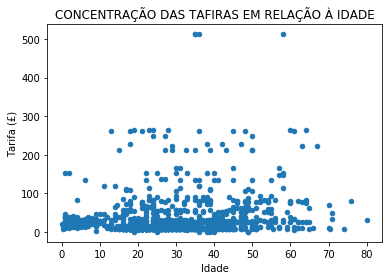

In [68]:
df_titanic.plot(x="age", y="fare", kind="scatter")
plt.xlabel("Idade", size=10)
plt.ylabel("Tarifa (£)", size=10)
plt.title("Concentração das tafiras em relação à idade".upper());


##### Para ver qual classe é predominante.
    
    Considerações:
        classe 1 - milionários
        classe 2 - classe alta
        classe 3 - classe média/baixa

In [85]:
classes = df_titanic.p_class.value_counts()

classes

3    709
1    323
2    277
Name: p_class, dtype: int64

### Atribuindo valores para as células da coluna "age" que não possuem valor

- Os valores foram gerados de forma randômica em relação ao valor médio da idade e o desvio padrão.

In [91]:
data = [df_titanic]

for dataset in data:
    mean = df_titanic["age"].mean()
    std = df_titanic["age"].std()
    is_null = dataset["age"].isnull().sum()
    # computar números aleatórios entre a média, std e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preencher valores NaN na coluna Idade com valores aleatórios gerados
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = df_titanic["age"].astype(int)

In [92]:
#verificando
df_titanic["age"].isnull().sum()

#deu certo

0

<br>

### Separando as pessoas por família
<br>

In [93]:
df_titanic["family"] = df_titanic.apply(lambda row: row["name"].split(",")[0], axis=1)

In [94]:
#verificando
df_titanic.head()

#deu certo

,passenger_id,survived,p_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Allen


In [95]:
df_titanic.sort_values("family")

,passenger_id,survived,p_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family
845,846,0,3,"Abbing, Mr. Anthony",male,42,0,0,C.A. 5547,7.5500,NaN,S,Abbing
1283,1284,0,3,"Abbott, Master. Eugene Joseph",male,13,0,2,C.A. 2673,20.2500,NaN,S,Abbott
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16,1,1,C.A. 2673,20.2500,NaN,S,Abbott
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,C.A. 2673,20.2500,NaN,S,Abbott
948,949,0,3,"Abelseth, Mr. Olaus Jorgensen",male,25,0,0,348122,7.6500,F G63,S,Abelseth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29,1,0,SC/PARIS 2167,27.7208,NaN,C,del Carlo
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40,0,2,A/5. 851,14.5000,NaN,S,van Billiard
1235,1236,0,3,"van Billiard, Master. James William",male,42,1,1,A/5. 851,14.5000,NaN,S,van Billiard
1083,1084,0,3,"van Billiard, Master. Walter John",male,11,1,1,A/5. 851,14.5000,NaN,S,van Billiard
